In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/train.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.head()
#allay,Utilities,Condition2,Exterior2nd,BsmtFinType2,BsmtFinSF2,FireplaceQu,PoolQC,Fence,MiscFeature

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.drop(["Alley","Utilities","Condition2","Exterior2nd","BsmtFinType2","BsmtFinSF2","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

df.shape

(1460, 71)

In [ ]:
df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

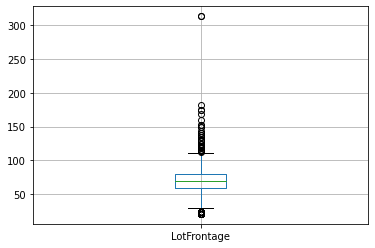

In [ ]:
df.boxplot(column='LotFrontage');

In [ ]:
df["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

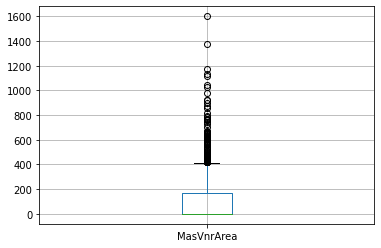

In [ ]:

df.boxplot(column='MasVnrArea');

In [ ]:
df["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

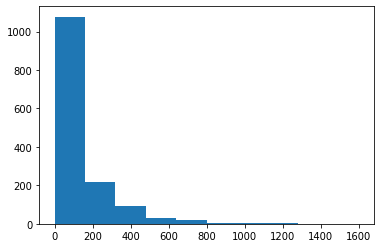

In [ ]:
plt.hist(df["MasVnrArea"]);

In [ ]:
df[df["ExterCond"]=="Po"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
250,251,30,RL,55.0,5350,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,450,5,2010,WD,Normal,76500


In [ ]:
df["BsmtFinSF1"].value_counts()

0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64

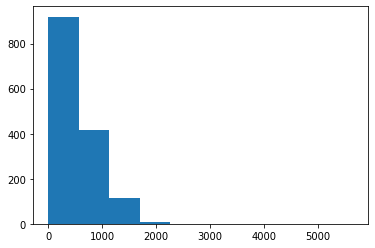

In [ ]:
plt.hist(df["BsmtFinSF1"]);

In [ ]:
nullValues=df.isnull().sum()
nullValues

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 71, dtype: int64

In [ ]:

nullValues[nullValues>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [ ]:
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df["GarageCond"].mode()

0    TA
dtype: object

In [ ]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)


df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

df.fillna(df.mode().iloc[0],inplace=True)












In [ ]:
enc = OrdinalEncoder()

cat=df.select_dtypes(include=object).columns.tolist()
df[cat]=enc.fit_transform(df[cat])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [ ]:
df.drop(columns=["Id","Street","GarageCond","Heating","MiscVal","LowQualFinSF","RoofMatl"])

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,3.0,3.0,4.0,0.0,5.0,2.0,...,61,0,0,0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,3.0,3.0,2.0,0.0,24.0,1.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,0.0,3.0,4.0,0.0,5.0,2.0,...,42,0,0,0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,0.0,3.0,0.0,0.0,6.0,2.0,...,35,272,0,0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,0.0,3.0,2.0,0.0,15.0,2.0,...,84,0,0,0,0,12,2008,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.0,62.0,7917,3.0,3.0,4.0,0.0,8.0,2.0,...,40,0,0,0,0,8,2007,8.0,4.0,175000
1456,20,3.0,85.0,13175,3.0,3.0,4.0,0.0,14.0,2.0,...,0,0,0,0,0,2,2010,8.0,4.0,210000
1457,70,3.0,66.0,9042,3.0,3.0,4.0,0.0,6.0,2.0,...,60,0,0,0,0,5,2010,8.0,4.0,266500
1458,20,3.0,68.0,9717,3.0,3.0,4.0,0.0,12.0,2.0,...,0,112,0,0,0,4,2010,8.0,4.0,142125


In [ ]:
x=df.drop(columns="SalePrice")
y=df["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)



In [ ]:
#from sklearn.svm import SVR

#svr_model = SVR()
#svr_model.fit(X_train, y_train)
#y_pred2=clf.predict(X_test)

In [ ]:
#mse = mean_squared_error(y_test,y_pred2)
#rmse = np.sqrt(mse)


#print(mse)
#print(rmse)

In [ ]:

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)


print(mse)
print(rmse)

719844893.990147
26829.92534447584


In [ ]:
feat=[i for i in x.columns]
imp=pd.Series(clf.feature_importances_,index=feat).sort_values(ascending=False)
imp

OverallQual     0.554003
GrLivArea       0.121825
TotalBsmtSF     0.033169
2ndFlrSF        0.031572
BsmtFinSF1      0.026699
                  ...   
LowQualFinSF    0.000131
BsmtHalfBath    0.000125
GarageCond      0.000074
MiscVal         0.000068
Street          0.000006
Length: 70, dtype: float64

In [ ]:
clf.fit(x,y)

RandomForestRegressor(n_estimators=1000)

In [ ]:
#svr_model.fit(x,y)

In [ ]:
newtest=pd.read_csv("newtest.csv")

In [ ]:
y_pred=clf.predict(newtest)

In [ ]:
#y_pred2=svr_model.predict(newtest)

In [ ]:
sub = pd.read_csv('sample_submission.csv')

In [ ]:
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [ ]:
sub["SalePrice"]= y_pred

In [ ]:
sub

,Id,SalePrice
0,1461,125913.263
1,1462,153812.116
2,1463,179664.861
3,1464,180675.598
4,1465,198453.986
...,...,...
1454,2915,84716.470
1455,2916,85582.263
1456,2917,152675.385
1457,2918,114026.303


In [ ]:
sub.to_csv("newsup.csv",index=False)